In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd

encodings=['utf-8','latin1', 'ISO-8859-1','cp1252']
file_path='spam1.csv'

for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"file successfully read with encodings:{encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding:{encoding}")

if 'df' in locals():
    print("CSV file has been successfully loaded")
else:
    print("All encoding attempts failed.Unable to real the csv file")

file successfully read with encodings:utf-8
CSV file has been successfully loaded


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5304,ham,Pls ask macho how much is budget for bb bold 2...,NaN,NaN,NaN
924,ham,Actually i deleted my old website..now i m blo...,NaN,NaN,NaN
1819,ham,Dunno dat's wat he told me. Ok lor...,NaN,NaN,NaN
47,ham,"Fair enough, anything going on?",NaN,NaN,NaN
2919,ham,"Thanx 4 the time weåÕve spent 2geva, its bin m...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Processing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8.Deploy

# data cleaning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
1235,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
5050,ham,With my sis lor... We juz watched italian job.
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...
3016,ham,One of the joys in lifeis waking up each daywi...
4343,ham,Hi:)did you asked to waheeda fathima about leave?


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
1672,spam,URGENT! We are trying to contact U. Todays dra...
2269,ham,Haha i think i did too
1502,ham,Don no da:)whats you plan?
4287,ham,Hey mr whats the name of that bill brison book...
4481,ham,What do u reckon as need 2 arrange transport i...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [11]:
df['target']= encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# eda

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

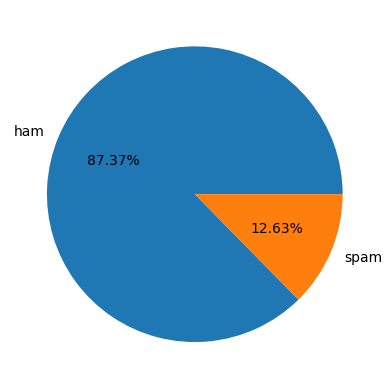

In [19]:
import matplotlib.pyplot as plt

# Assuming df['target'] contains the categories 'ham' and 'spam'
counts = df['target'].value_counts()

# Creating a pie chart
plt.pie(counts, labels=['ham', 'spam'], autopct="%0.2f%%")

# Display the plot
plt.show()

In [20]:
!pip install matplotlib



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


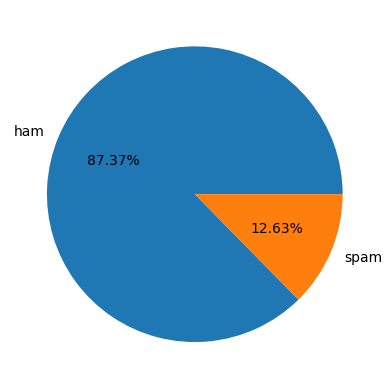

In [21]:
import matplotlib.pyplot as plt

# Assuming df['target'] contains the categories 'ham' and 'spam'
counts = df['target'].value_counts()

# Creating a pie chart
plt.pie(counts, labels=['ham', 'spam'], autopct="%0.2f%%")

# Display the plot
plt.show()

In [22]:
!pip install nltk


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']= df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
 df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [28]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

In [35]:
!pip install seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

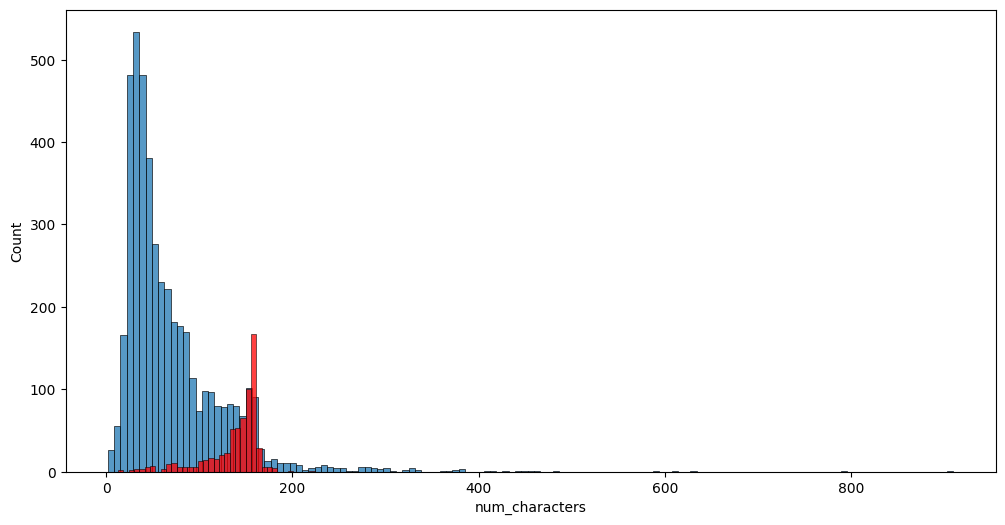

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

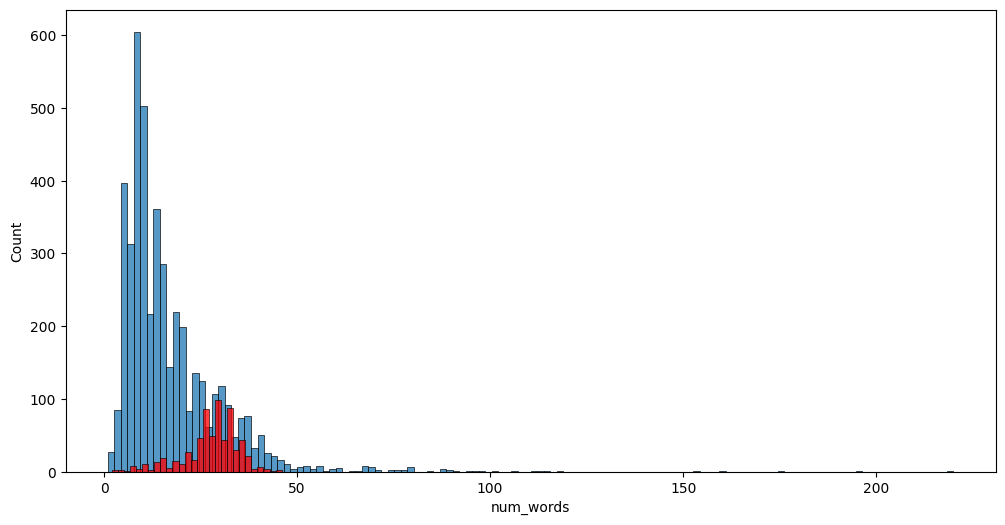

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

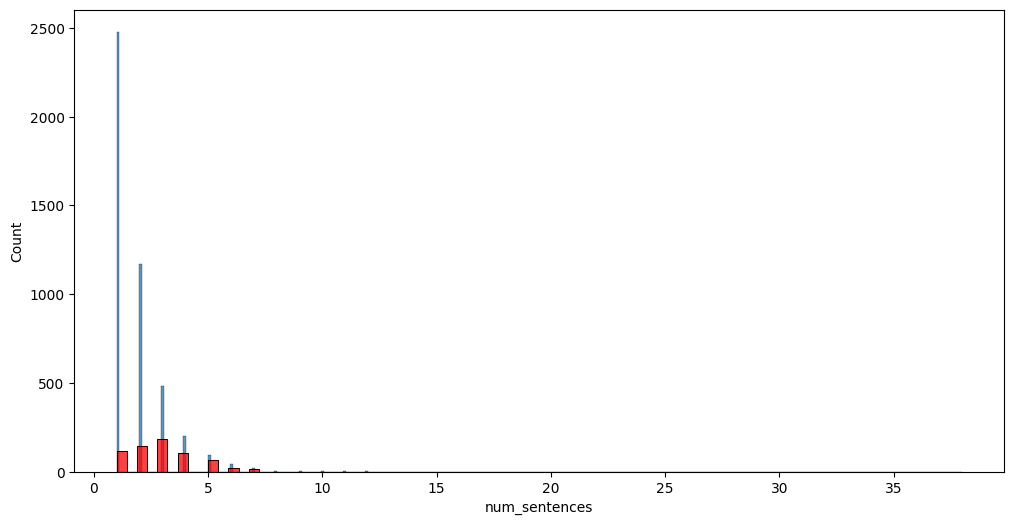

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'], color='red')

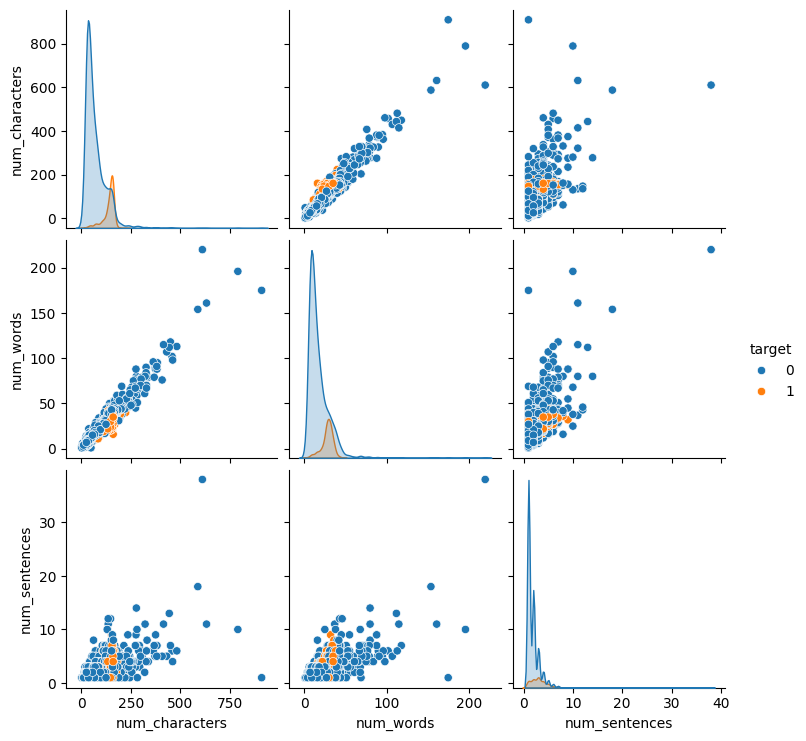

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

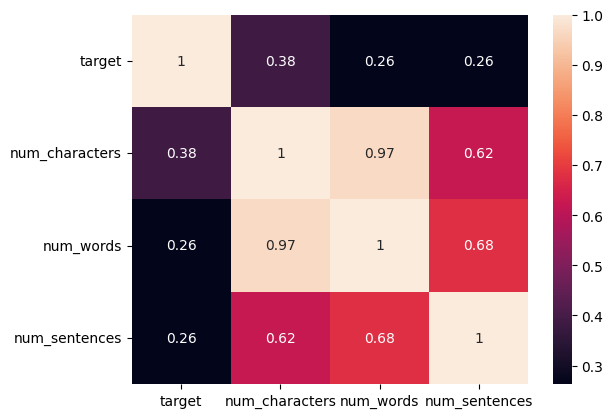

In [41]:
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)


# data processing

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore, tonight, k? I've cried enough today")
print(transformed_text)



    

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('loving')

'love'

In [45]:
df['transformed_text']= df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
!pip install wordcloud


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

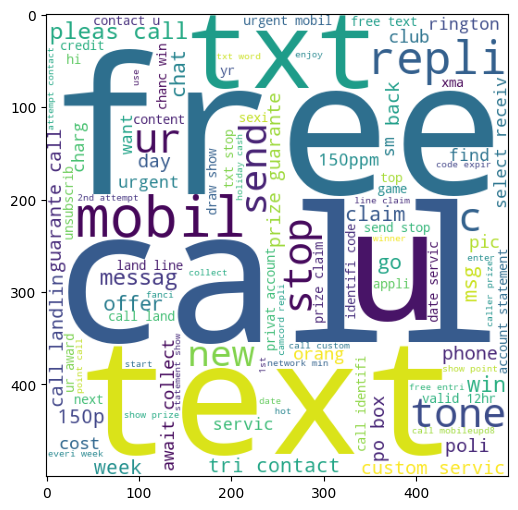

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

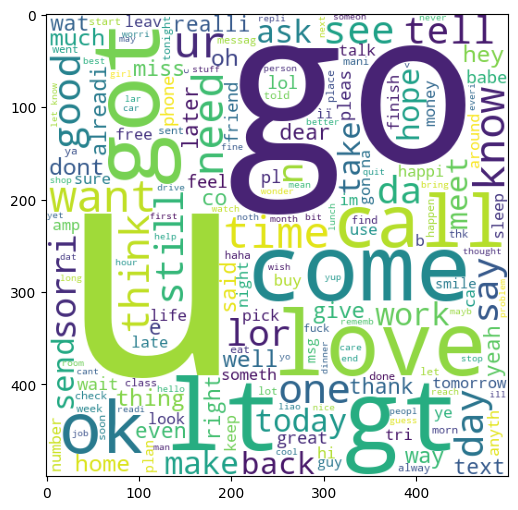

In [51]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

C:\Users\dell\AppData\Local\Temp\ipykernel_16956\3118589163.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=word_counts, palette='viridis')  # or any other color palette


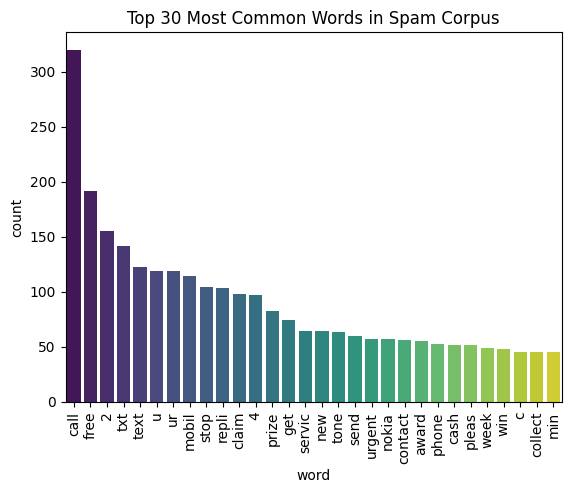

In [55]:
from collections import Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Sort the DataFrame by count in descending order (though `most_common` already returns sorted data)
word_counts = word_counts.sort_values(by='count', ascending=False)

# Create a colorful bar plot
sns.barplot(x='word', y='count', data=word_counts, palette='viridis')  # or any other color palette

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Add a title to the plot
plt.title('Top 30 Most Common Words in Spam Corpus')

# Display the plot
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Initial number of words in ham_corpus: 35404
Sample words from ham_corpus: ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la']
Filtered number of words in ham_corpus: 35404
Sample words from ham_corpus: ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la']


C:\Users\dell\AppData\Local\Temp\ipykernel_16956\217996533.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=word_counts, palette='viridis')


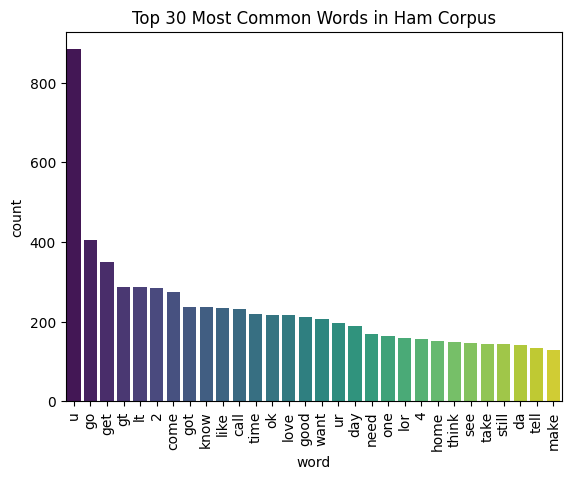

In [56]:
import pandas as pd
from collections import Counter
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

# Download NLTK's punkt tokenizer
nltk.download('punkt')

# Initialize the ham_corpus list
ham_corpus = []

# Iterate over each transformed text for non-spam (ham) messages
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    if isinstance(msg, str) and msg.strip():  # Ensure msg is a non-empty string
        words = nltk.word_tokenize(msg)  # Use NLTK's word tokenizer
        ham_corpus.extend(words)

# Debugging: Check the length and a sample of the corpus
print(f"Initial number of words in ham_corpus: {len(ham_corpus)}")
print(f"Sample words from ham_corpus: {ham_corpus[:10]}")

# Filter out non-alphanumeric tokens and empty strings
ham_corpus = [word for word in ham_corpus if word.isalnum()]

# Recheck the count after filtering
print(f"Filtered number of words in ham_corpus: {len(ham_corpus)}")
print(f"Sample words from ham_corpus: {ham_corpus[:10]}")

# Get the 30 most common words and their counts
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Create a colorful bar plot in descending order
sns.barplot(x='word', y='count', data=word_counts, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Add a title to the plot
plt.title('Top 30 Most Common Words in Ham Corpus')

# Display the plot
plt.show()


In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# building the model (converting char into numerical values)


In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [59]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
X.shape

(5169, 3000)

In [61]:
y=df['target'].values

In [62]:
from sklearn.model_selection import train_test_split


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [65]:
gnb= GaussianNB
mnb=MultinomialNB
bnb=BernoulliNB

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred1 = gnb.predict(X_test)

# Print evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


Accuracy Score: 0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision Score: 0.5068493150684932


In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()  # Note the parentheses to create an instance

# Fit the model
mnb.fit(X_train, y_train)

# Predict on the test set
y_pred1 = mnb.predict(X_test)

# Print evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


Accuracy Score: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision Score: 1.0


In [68]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()  # Note the parentheses to create an instance

# Fit the model
bnb.fit(X_train, y_train)

# Predict on the test set
y_pred1 = bnb.predict(X_test)

# Print evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score:", precision_score(y_test, y_pred1))


Accuracy Score: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision Score: 0.991869918699187


In [69]:
!pip install xgboost


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [71]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb= MultinomialNB
dtc= DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)

In [72]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

clfs = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "Voting": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft'),
    "Stacking": StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ], final_estimator=LogisticRegression()),

    "SVM": SVC(),
    "LinearSVC": LinearSVC(),

    "LogisticRegression": LogisticRegression(),
    "RidgeClassifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "PassiveAggressive": PassiveAggressiveClassifier(),
    
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),

    "KNeighbors": KNeighborsClassifier(),
    
    "DecisionTree": DecisionTreeClassifier(),
    "ExtraTree": ExtraTreeClassifier(),

    "MLPClassifier": MLPClassifier(),

    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),

    "GaussianProcess": GaussianProcessClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),

    "SGDClassifier": SGDClassifier()
}


In [84]:
accutracy_scores=[]
precision_scores=[]
for name, clf in clfs.items():
    print(f"Evaluating {name} with classifier type: {type(clf)}")
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    accutracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


Evaluating RandomForest with classifier type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.9777562862669246
Precision: 0.9778691855345047
Evaluating GradientBoosting with classifier type: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Accuracy: 0.9545454545454546
Precision: 0.9535652322150825
Evaluating AdaBoost with classifier type: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9613152804642167
Precision: 0.9608346521305903
Evaluating Bagging with classifier type: <class 'sklearn.ensemble._bagging.BaggingClassifier'>
Accuracy: 0.9487427466150871
Precision: 0.9471875698208119
Evaluating ExtraTrees with classifier type: <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
Accuracy: 0.9777562862669246
Precision: 0.9777088114916305
Evaluating Voting with classifier type: <class 'sklearn.ensemble._voting.VotingClassifier'>
Accuracy: 0.9816247582205029
Precision: 0.981544316133741
Evaluating Stacking with classifier type: <class 'sklearn.ensemble._stacking.StackingClassifier'>
Accuracy: 0.9806576402321083
Precision: 0.9804937150517804
Evaluating SVM with classifier type: <class 'sklearn.svm._classes.SVC'>
Accuracy: 0.9729206963249516
Precision: 0.9731694470386715
Evaluating LinearSVC with classifier type: <class 'sklearn.svm._classes.LinearSVC'>
Accuracy: 0.9787234042553191
Precision: 0.9785544585819123
Evaluating LogisticRegression with classifier t

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.7176015473887815
Precision: 0.9047699437797232
Evaluating GaussianProcess with classifier type: <class 'sklearn.gaussian_process._gpc.GaussianProcessClassifier'>
Accuracy: 0.9274661508704062
Precision: 0.93306866238917
Evaluating HistGradientBoosting with classifier type: <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
Accuracy: 0.9738878143133463
Precision: 0.9734603758248166
Evaluating SGDClassifier with classifier type: <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
Accuracy: 0.9748549323017408
Precision: 0.9746936754292777


In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    if not hasattr(clf, 'fit'):
        raise TypeError("The provided clf is not a valid scikit-learn estimator")
    
    clf.fit(X_train, y_train)  # This is where the error is occurring
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision


In [87]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accutracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision
15,BernoulliNB,0.983559,0.983696
5,Voting,0.981625,0.981544
6,Stacking,0.980658,0.980494
8,LinearSVC,0.978723,0.978554
0,RandomForest,0.977756,0.977869
10,RidgeClassifier,0.977756,0.977869
4,ExtraTrees,0.977756,0.977709
20,MLPClassifier,0.975822,0.975481
12,PassiveAggressive,0.974855,0.974694
25,SGDClassifier,0.974855,0.974694


In [89]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,BernoulliNB,Accuracy,0.983559
1,Voting,Accuracy,0.981625
2,Stacking,Accuracy,0.980658
3,LinearSVC,Accuracy,0.978723
4,RandomForest,Accuracy,0.977756
5,RidgeClassifier,Accuracy,0.977756
6,ExtraTrees,Accuracy,0.977756
7,MLPClassifier,Accuracy,0.975822
8,PassiveAggressive,Accuracy,0.974855
9,SGDClassifier,Accuracy,0.974855


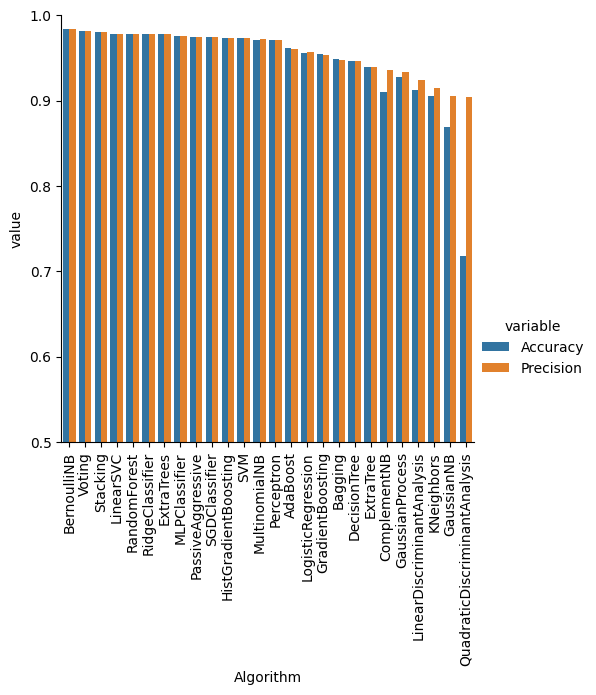

In [90]:
sns.catplot(x='Algorithm' , y='value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [102]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accutracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)


In [104]:
new_df=performance_df.merge(temp_df, on='Algorithm')

In [97]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [105]:
temp_df_min_precision = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accutracy_scores,
    'Precision_num_chars': precision_scores
}).sort_values('Precision_num_chars', ascending=True)

In [106]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,BernoulliNB,0.983559,0.983696,0.983559,0.983696,0.983559,0.983696,0.983559,0.983696
1,Voting,0.981625,0.981544,0.981625,0.981544,0.981625,0.981544,0.981625,0.981544
2,Stacking,0.980658,0.980494,0.980658,0.980494,0.980658,0.980494,0.980658,0.980494
3,LinearSVC,0.978723,0.978554,0.978723,0.978554,0.978723,0.978554,0.978723,0.978554
4,RandomForest,0.977756,0.977869,0.977756,0.977869,0.977756,0.977869,0.977756,0.977869
5,RidgeClassifier,0.977756,0.977869,0.977756,0.977869,0.977756,0.977869,0.977756,0.977869
6,ExtraTrees,0.977756,0.977709,0.977756,0.977709,0.977756,0.977709,0.977756,0.977709
7,MLPClassifier,0.975822,0.975481,0.975822,0.975481,0.975822,0.975481,0.975822,0.975481
8,PassiveAggressive,0.974855,0.974694,0.974855,0.974694,0.974855,0.974694,0.974855,0.974694
9,SGDClassifier,0.974855,0.974694,0.974855,0.974694,0.974855,0.974694,0.974855,0.974694


In [114]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier


In [115]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [120]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Create instances of the classifiers
clf1 = RandomForestClassifier()
clf2 = SVC(probability=True)  # Ensure probability=True for soft voting
clf3 = LogisticRegression()

# Combine them into a VotingClassifier instance
voting = VotingClassifier(estimators=[
    ('rf', clf1), 
    ('svc', clf2), 
    ('lr', clf3)
], voting='soft')  # Use 'hard' for majority voting or 'soft' for weighted probabilities

# Fit the VotingClassifier on your training data
voting.fit(X_train, y_train)

# Predict on the test data
y_pred = voting.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Accuracy: 0.9787234042553191
Precision: 0.9788141906047767


In [121]:
estimators=[
    ('svm',svc),('nb',mnb),('et',etc)
]
final_estimator=RandomForestClassifier()

In [125]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Create instances of your base estimators
estimators = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('lr', LogisticRegression())
]

# Create an instance of your final estimator
final_estimator = LogisticRegression()

# Initialize the StackingClassifier with instances
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Fit the StackingClassifier on your training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9806576402321083
Precision: 0.9804937150517804


In [126]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [133]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample training data
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0]

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')

# Transform the training data into TF-IDF features
X_train_tfidf = tfidf.fit_transform(X_train)

# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the TF-IDF Vectorizer to a file
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

# Save the trained model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)